# Project 17: Analyse des Ventes de jeux vidéo

## Introduction
Le présent notebook explore les données relatives aux Ventes de jeux vidéo,et les résultats d'une enquête de satisfaction client (`data2`). L'objectif est de fournir une analyse détaillée des disques durs les plus satisfaisants, en tenant compte de leurs caractéristiques, afin de proposer une sélection de produits à la vente sur un site web spécialisé dans la vente de matériel électronique, qui souhaiterait rajouter des disques durs dans son catalogue.





##Import des données et des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


column_names = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
                'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
                'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1P9TUltL8JhXRoY5cDqp9spznYeBs62__', sep=",", names=column_names, header=0)


print(df.head())
print(df.columns)


                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0       Sportss  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser le dataframe en deux ensembles: train (70%) et test (30%)
train, test = train_test_split(df, test_size=0.3, random_state=42)

# Afficher les tailles des ensembles
print(f"Train size: {train.shape}")
print(f"Test size: {test.shape}")


Train size: (11703, 16)
Test size: (5016, 16)


##On effectue ensuite un netoyage des fichiers

In [ ]:
# Supprimer les lignes où Global_Sales n'est pas fourni
train = train.dropna(subset=['Global_Sales'])
test = test.dropna(subset=['Global_Sales'])

In [ ]:
print(f"Train size: {train.shape}")
print(f"Test size: {test.shape}")


Train size: (11703, 16)
Test size: (5016, 16)


In [ ]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes dans chaque colonne :\n", missing_values)

# Supprimer les lignes avec des valeurs manquantes dans les colonnes critiques
df_cleaned = df.dropna(subset=['Name', 'Platform', 'Year_of_Release'])

# Convertir les valeurs numériques appropriées dans User_Score
df_cleaned['User_Score'] = pd.to_numeric(df_cleaned['User_Score'], errors='coerce')

# Remplir les valeurs manquantes des autres colonnes avec des valeurs appropriées
df_cleaned['Critic_Score'].fillna(df_cleaned['Critic_Score'].mean(), inplace=True)
df_cleaned['User_Score'].fillna(df_cleaned['User_Score'].mean(), inplace=True)

print(df_cleaned.info())


Valeurs manquantes dans chaque colonne :
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 16448 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16448 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16448 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16448 non-null  float64
 6   EU_Sales         16448 non-null  float64
 7   JP_Sales         16448 non-null  float

<ipython-input-6-04149c7e2a1c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['User_Score'] = pd.to_numeric(df_cleaned['User_Score'], errors='coerce')
<ipython-input-6-04149c7e2a1c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Critic_Score'].fillna(df_cleaned['Critic_Score'].mean(), inplace=True)
<ipython-input-6-04149c7e2a1c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [ ]:
print(f"Train size: {train.shape}")
print(f"Test size: {test.shape}")

Train size: (11703, 16)
Test size: (5016, 16)


##Pour vérifier que toutes les variables catégorielles ont le même nom:





In [ ]:
# Sélection des colonnes catégorielles
colonnes_categorielles = ['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Critic_Score', 'User_Score', 'Developer', 'Rating']

print("----TRAIN DATA------")
# Boucle pour afficher les valeurs uniques pour chaque colonne dans l'ensemble d'entraînement
for colonne in colonnes_categorielles:
    valeurs_uniques = train[colonne].value_counts()
    print(f"Valeurs uniques pour la colonne '{colonne}':\n{valeurs_uniques}\n")

print("----TEST DATA------")
# Boucle pour afficher les valeurs uniques pour chaque colonne dans l'ensemble de test
for colonne in colonnes_categorielles:
    valeurs_uniques = test[colonne].value_counts()
    print(f"Valeurs uniques pour la colonne '{colonne}':\n{valeurs_uniques}\n")


----TRAIN DATA------
Valeurs uniques pour la colonne 'Platform':
Platform
DS      1513
PS2     1484
Wii      917
PS3      903
X360     888
PSP      869
PS       838
PC       699
XB       608
GBA      579
GC       386
3DS      335
PSV      317
PS4      273
N64      218
XOne     171
SNES     163
SAT      121
WiiU      97
2600      93
NES       75
GB        72
DC        40
GEN       22
NG         9
SCD        5
WS         3
3DO        2
TG16       1
PCFX       1
GG         1
Name: count, dtype: int64

Valeurs uniques pour la colonne 'Year_of_Release':
Year_of_Release
2008.0    1001
2009.0     988
2010.0     899
2007.0     847
2011.0     802
2006.0     698
2005.0     664
2002.0     586
2004.0     557
2003.0     522
2012.0     449
2015.0     420
2014.0     405
2013.0     364
2016.0     340
2001.0     327
1998.0     260
2000.0     248
1999.0     231
1997.0     206
1996.0     188
1995.0     153
1994.0      83
1993.0      45
1991.0      34
1992.0      32
1981.0      30
1982.0      25
1986.0   

On remarque une erreur dans les valeurs catégorielles de Genre: on y trouve "Sports" et "Sportss"

In [ ]:
df['Genre'] = df['Genre'].replace('Sportss', 'Sports')
print("Valeurs uniques pour la colonne 'Genre' après correction :\n", test['Genre'].value_counts())


Valeurs uniques pour la colonne 'Genre' après correction :
 Genre
Action          1036
Sports           687
Misc             514
Role-Playing     469
Shooter          393
Adventure        378
Racing           346
Simulation       292
Platform         253
Fighting         253
Strategy         225
Puzzle           169
Name: count, dtype: int64


## Exploration des Données
Commençons par jeter un coup d'œil aux premières lignes des jeux de données pour comprendre leur structure.


In [ ]:
print("Premières lignes de l'ensemble d'entraînement (train) :")
display(train.head())

print("Premières lignes de l'ensemble de test (test) :")
display(test.head())

Premières lignes de l'ensemble d'entraînement (train) :


NameError: name 'train' is not defined

# **Analyse graphique**

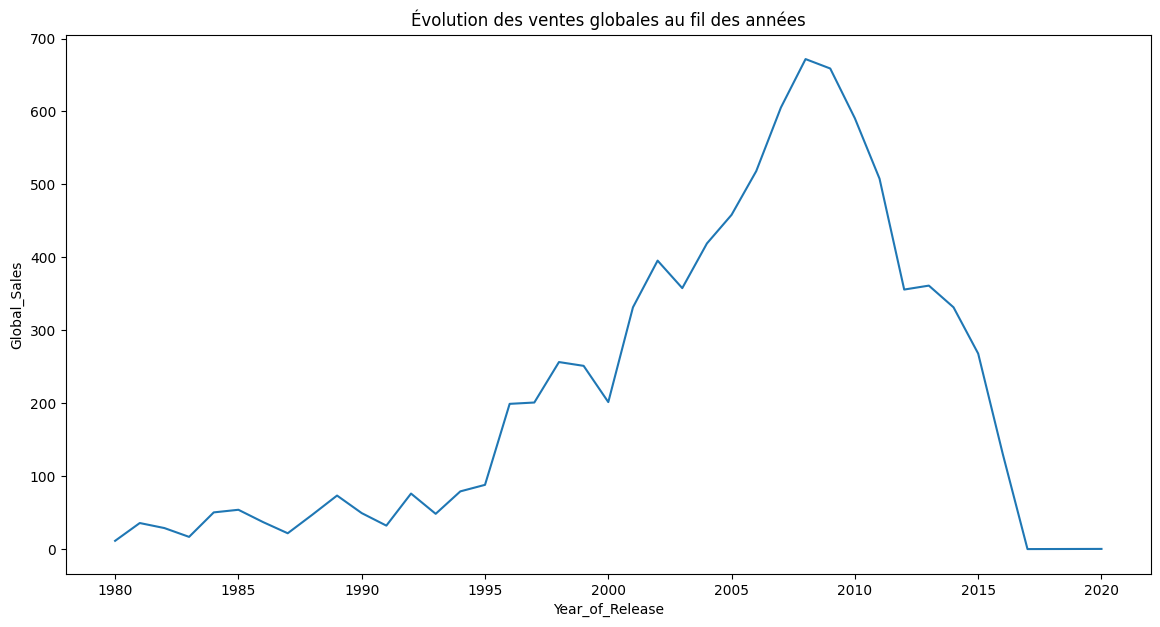

In [ ]:
# Grouper les données par année et sommer les ventes globales
annual_sales = df.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()

# Créer un graphique en lignes
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year_of_Release', y='Global_Sales', data=annual_sales)
plt.title('Évolution des ventes globales au fil des années')
plt.show()

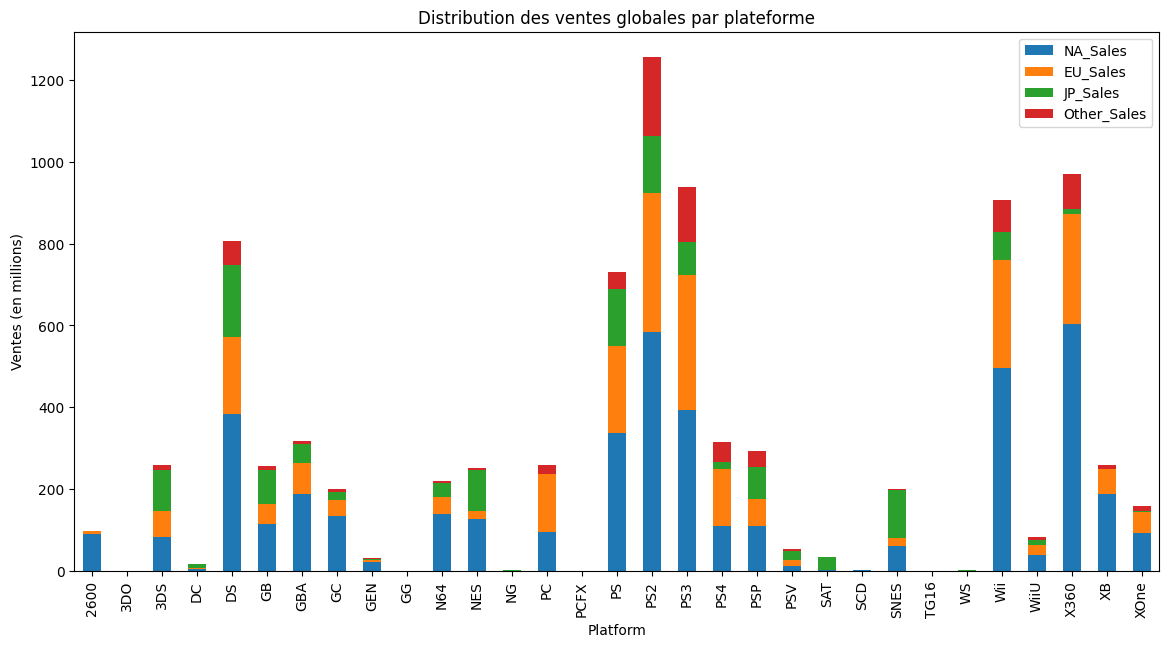

In [ ]:
platform_sales = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

ax = platform_sales.plot(kind='bar', stacked=True, figsize=(14, 7), edgecolor='none')

plt.title('Distribution des ventes globales par plateforme')
plt.ylabel('Ventes (en millions)')
plt.xlabel('Platform')
plt.xticks(rotation=90)

plt.show()


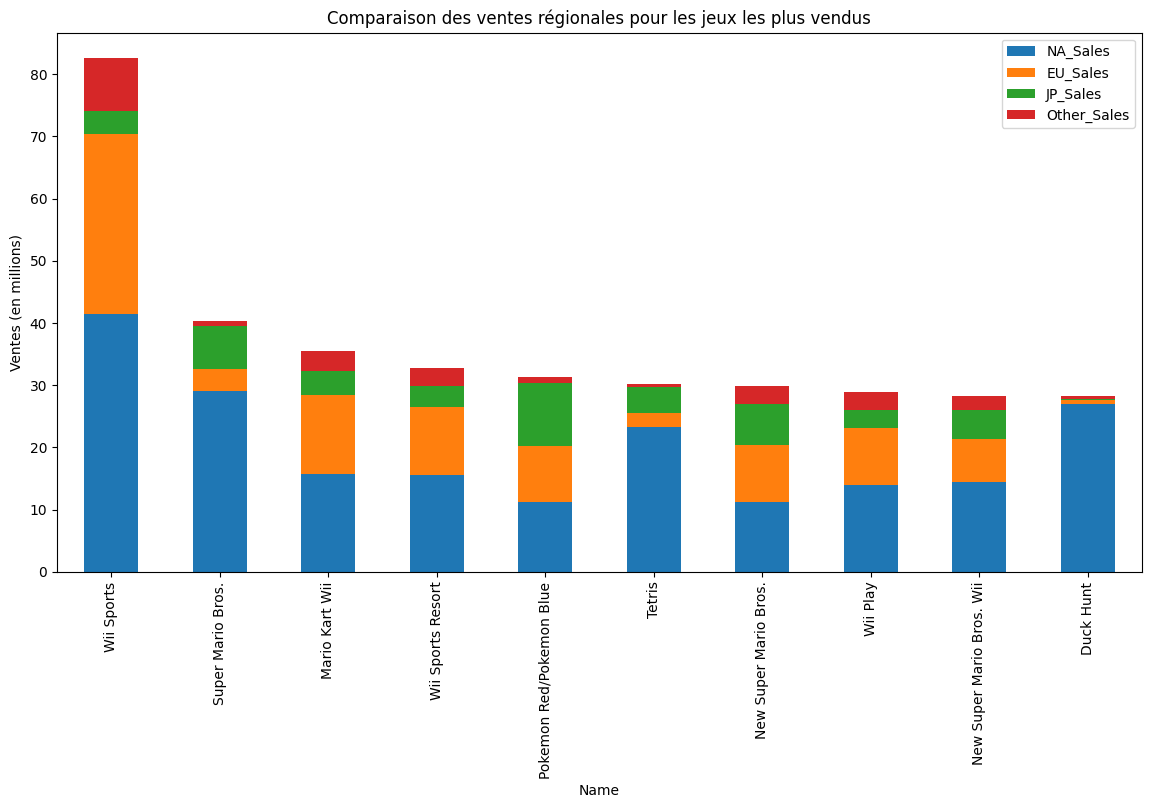

In [ ]:
top_games = df.nlargest(10, 'Global_Sales')
top_games[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].set_index('Name').plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Comparaison des ventes régionales pour les jeux les plus vendus')
plt.ylabel('Ventes (en millions)')
plt.xticks(rotation=90)
plt.show()


On remarque ici que la plus grande partie du marché ce trouve en Amérique du Nord
En deuxieme place on trouve l'Europe

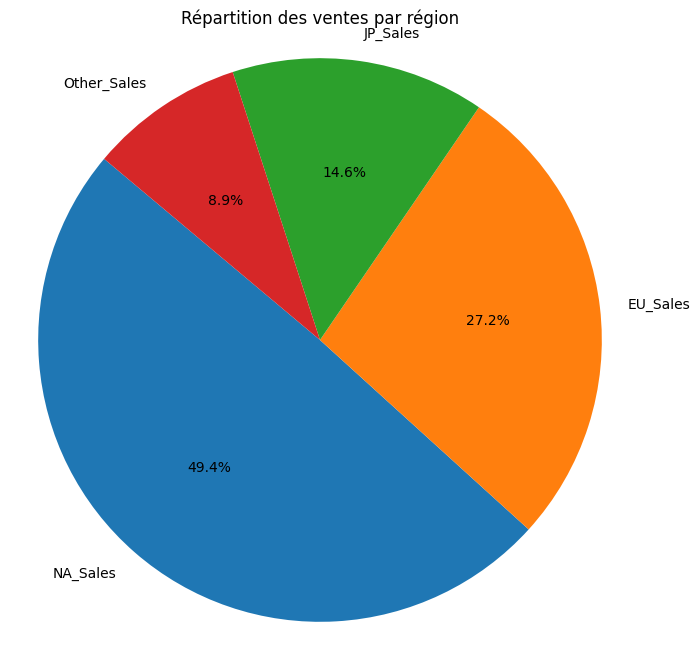

In [ ]:

sales_by_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(8, 8))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des ventes par région')
plt.axis('equal')  # Assurer que le graphique soit circulaire
plt.show()

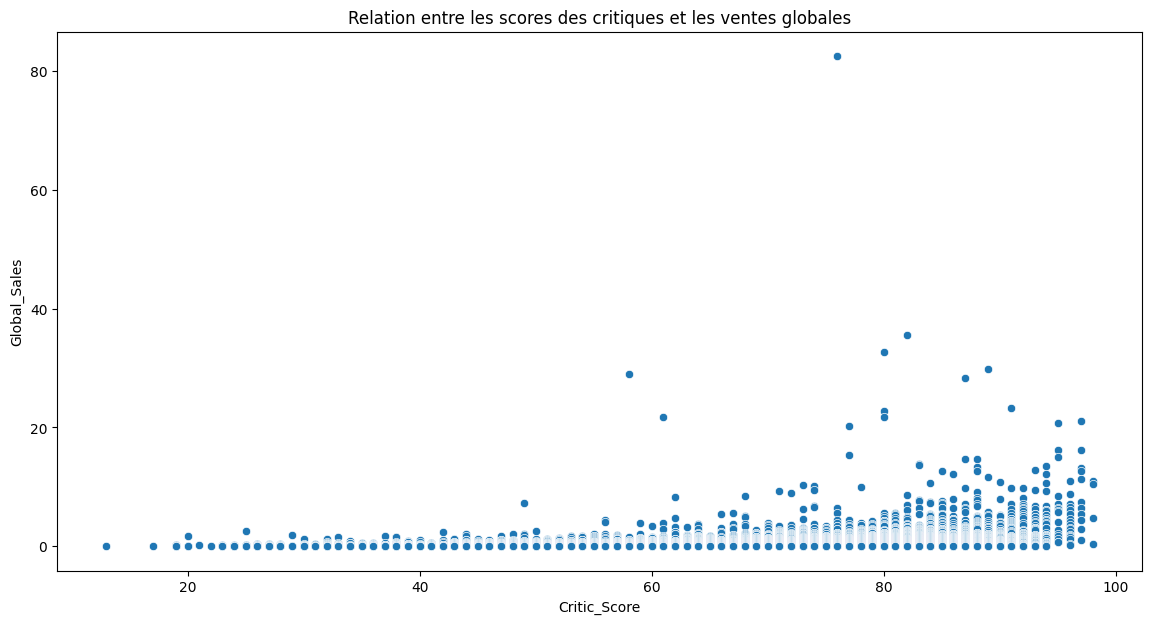

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=df)
plt.title('Relation entre les scores des critiques et les ventes globales')
plt.show()


In [ ]:
# Statistiques descriptives
print(df_cleaned.describe())

# Ventes globales par plateforme
platform_sales = df_cleaned.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
print("Ventes globales par plateforme :\n", platform_sales)

# Ventes globales par genre
genre_sales = df_cleaned.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print("Ventes globales par genre :\n", genre_sales)


       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16448.000000  16448.000000  16448.000000  16448.000000   
mean       2006.488996      0.263965      0.145895      0.078472   
std           5.877470      0.818286      0.506660      0.311064   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Score  \
count  16448.000000   16448.00000  16448.000000   7983.000000  16448.000000   
mean       0.047583       0.53617     68.994363     26.441313      7.126330   
std        0.187984       1.55846      9.697362     19.008136      1.009986   
min        0.000000       0.01000     13.000000      3.000000      0.00

<ipython-input-22-7e60001411a0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_platforms.values, y=top_10_platforms.index, palette='viridis')


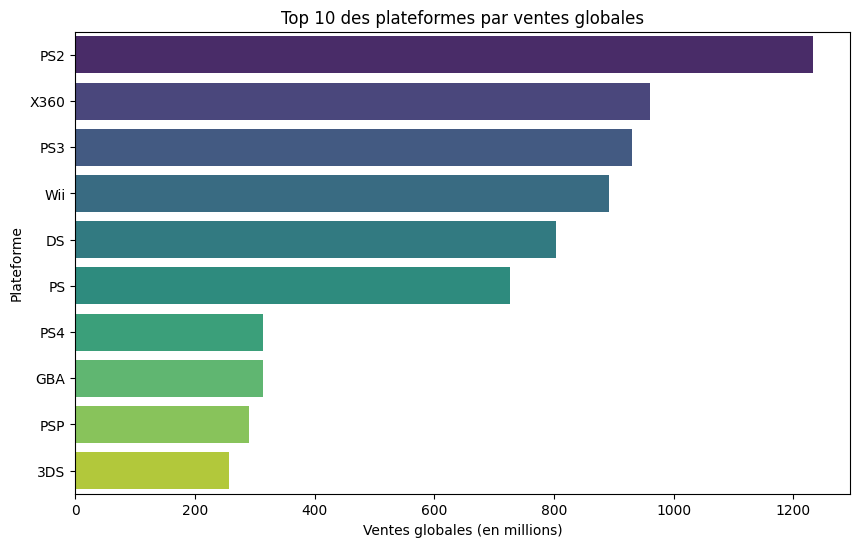

In [ ]:
# Top 10 des plateformes par ventes globales
top_10_platforms = platform_sales.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_platforms.values, y=top_10_platforms.index, palette='viridis')
plt.title('Top 10 des plateformes par ventes globales')
plt.xlabel('Ventes globales (en millions)')
plt.ylabel('Plateforme')
plt.show()

<ipython-input-23-dba260dbe433>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='viridis')


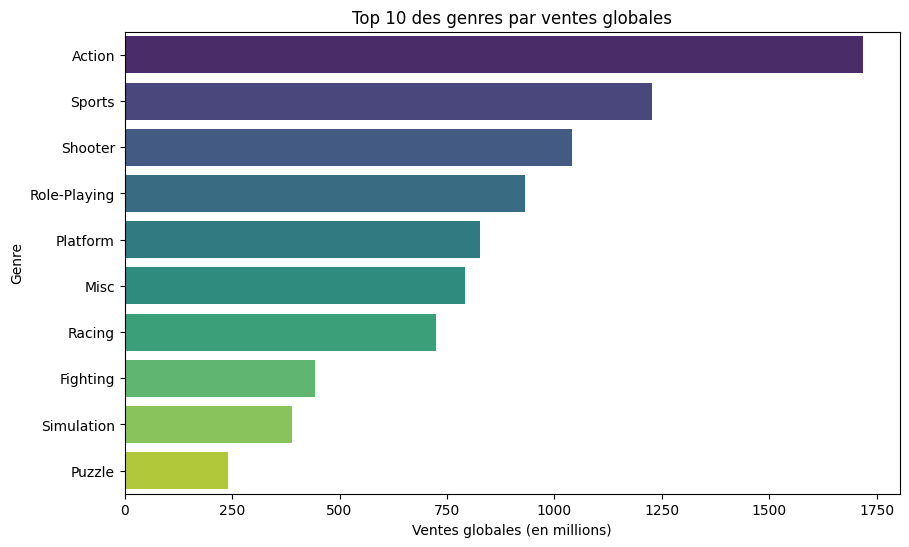

In [ ]:
# Top 10 des genres par ventes globales
top_10_genres = genre_sales.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='viridis')
plt.title('Top 10 des genres par ventes globales')
plt.xlabel('Ventes globales (en millions)')
plt.ylabel('Genre')
plt.show()

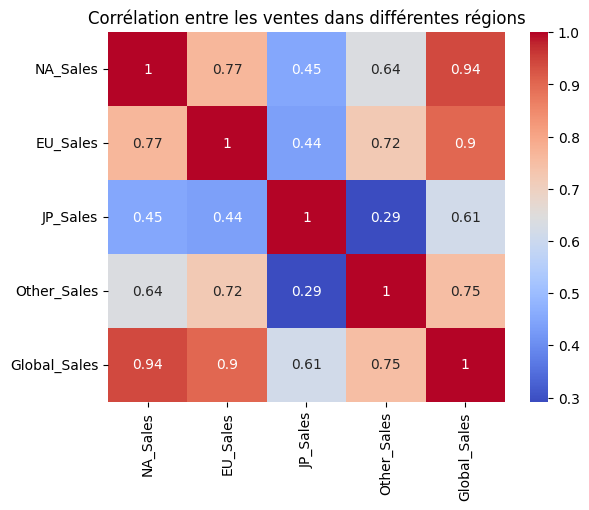

In [ ]:
# Corrélation entre les ventes dans différentes régions
correlation_matrix = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation entre les ventes dans différentes régions')
plt.show()


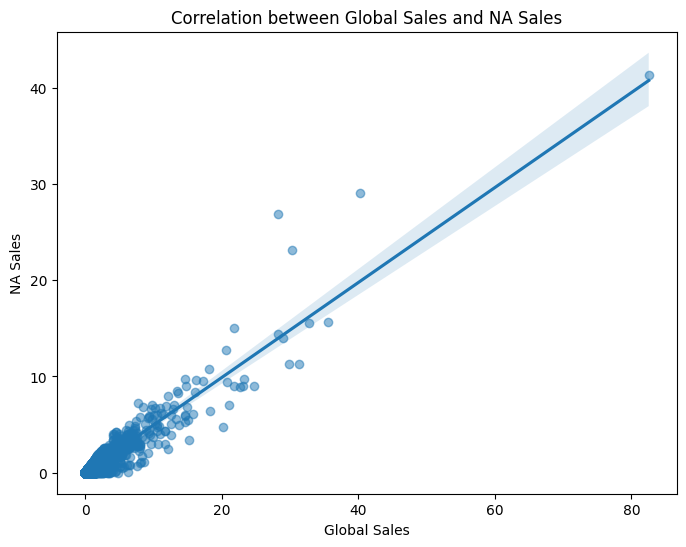

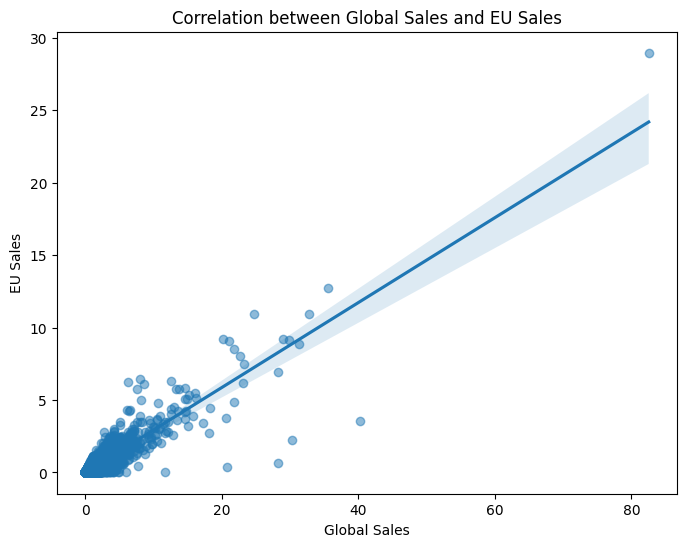

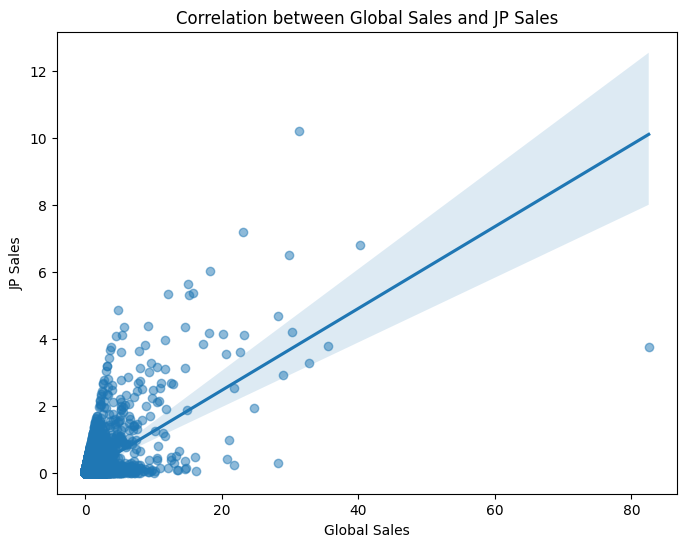

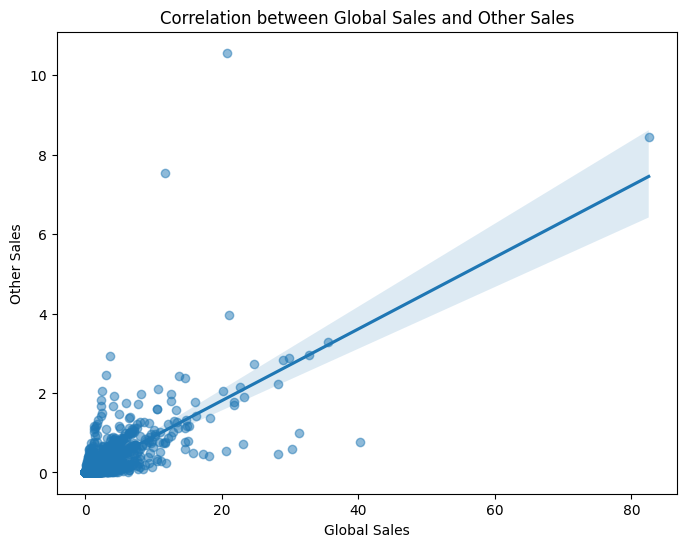

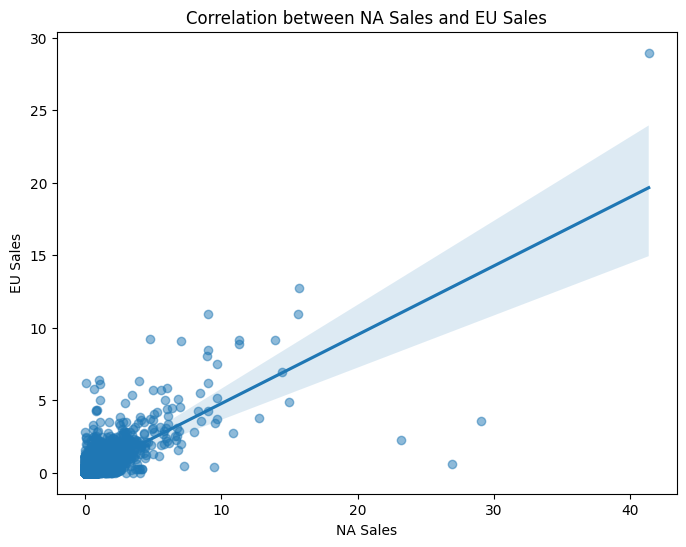

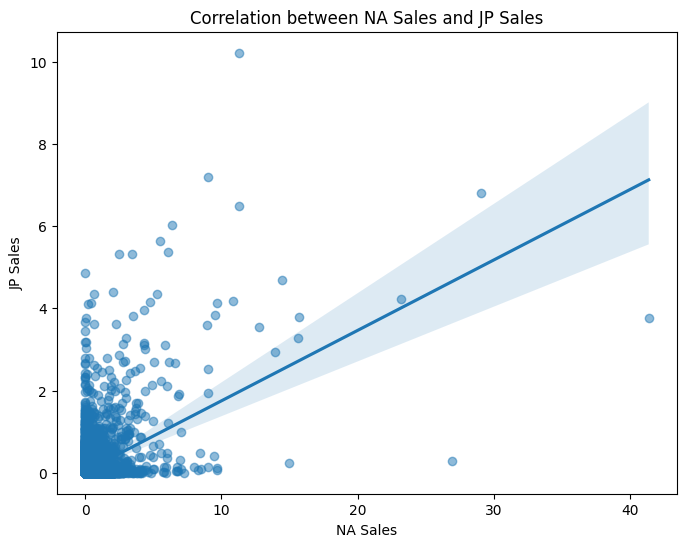

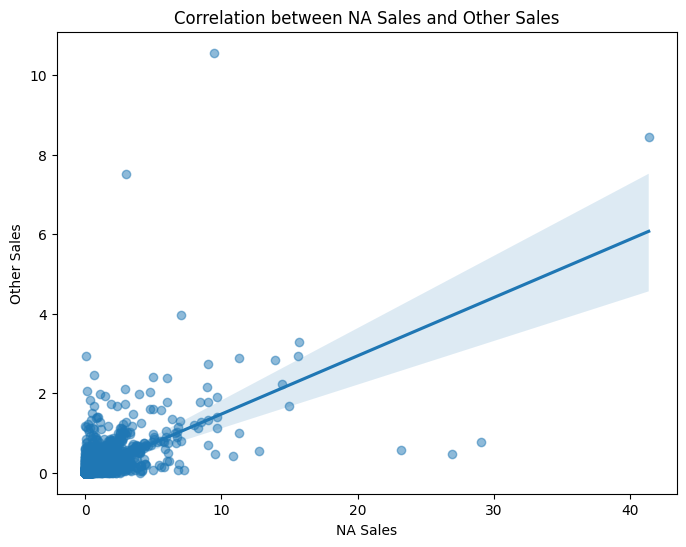

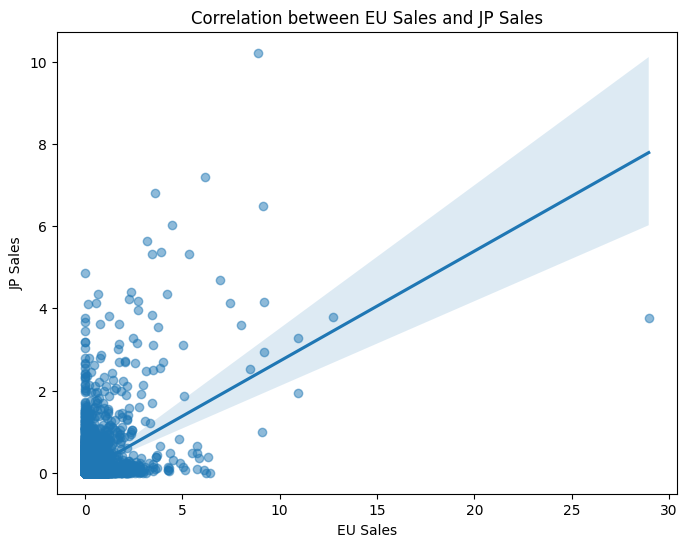

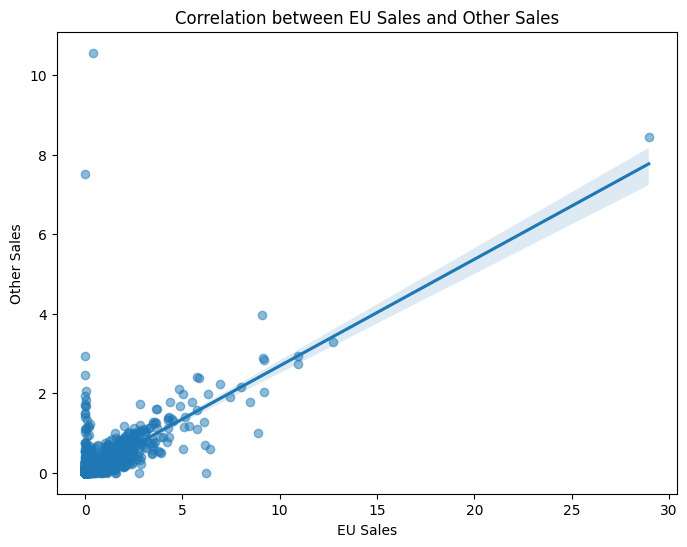

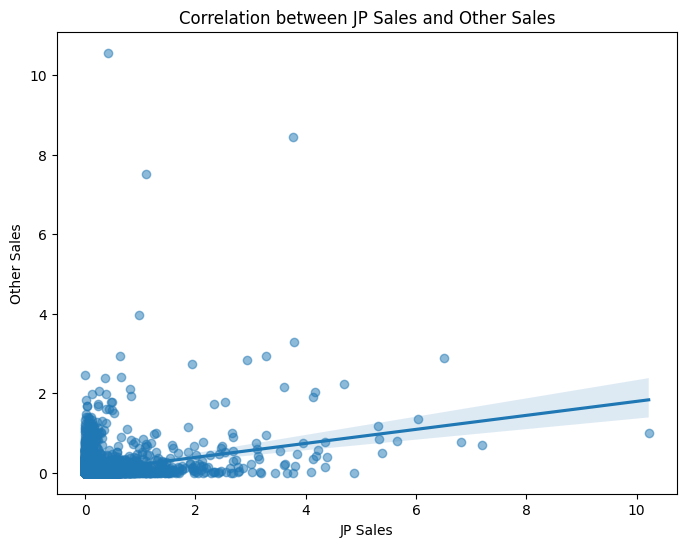

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction pour tracer des graphiques de dispersion avec une ligne de régression
def plot_scatter(x, y, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x, y=y, data=df_cleaned, scatter_kws={'alpha':0.5})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Correlation between {xlabel} and {ylabel}')
    plt.show()

# Corrélation entre Global_Sales et NA_Sales
plot_scatter('Global_Sales', 'NA_Sales', 'Global Sales', 'NA Sales')

# Corrélation entre Global_Sales et EU_Sales
plot_scatter('Global_Sales', 'EU_Sales', 'Global Sales', 'EU Sales')

# Corrélation entre Global_Sales et JP_Sales
plot_scatter('Global_Sales', 'JP_Sales', 'Global Sales', 'JP Sales')

# Corrélation entre Global_Sales et Other_Sales
plot_scatter('Global_Sales', 'Other_Sales', 'Global Sales', 'Other Sales')

# Corrélation entre NA_Sales et EU_Sales
plot_scatter('NA_Sales', 'EU_Sales', 'NA Sales', 'EU Sales')

# Corrélation entre NA_Sales et JP_Sales
plot_scatter('NA_Sales', 'JP_Sales', 'NA Sales', 'JP Sales')

# Corrélation entre NA_Sales et Other_Sales
plot_scatter('NA_Sales', 'Other_Sales', 'NA Sales', 'Other Sales')

# Corrélation entre EU_Sales et JP_Sales
plot_scatter('EU_Sales', 'JP_Sales', 'EU Sales', 'JP Sales')

# Corrélation entre EU_Sales et Other_Sales
plot_scatter('EU_Sales', 'Other_Sales', 'EU Sales', 'Other Sales')

# Corrélation entre JP_Sales et Other_Sales
plot_scatter('JP_Sales', 'Other_Sales', 'JP Sales', 'Other Sales')


In [ ]:
# Vérifier la corrélation entre la note (Critic_Score et User_Score) et les ventes globales (Global_Sales)
correlation_critic = df_cleaned['Critic_Score'].corr(df_cleaned['Global_Sales'])
correlation_user = df_cleaned['User_Score'].corr(df_cleaned['Global_Sales'])

print(f"Corrélation entre Critic_Score et Global_Sales: {correlation_critic}")
print(f"Corrélation entre User_Score et Global_Sales: {correlation_user}")


Corrélation entre Critic_Score et Global_Sales: 0.2008190502482274
Corrélation entre User_Score et Global_Sales: 0.071802256962385


In [ ]:
# Sélectionner les colonnes numériques
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_cleaned[numeric_columns]


In [ ]:
# Calcul des corrélations
correlation_matrix = df_numeric.corr()

# Affichage des corrélations
print(correlation_matrix)


                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.092388  0.003909 -0.168497     0.037701   
NA_Sales               -0.092388  1.000000  0.766548  0.451166     0.638484   
EU_Sales                0.003909  0.766548  1.000000  0.435902     0.722683   
JP_Sales               -0.168497  0.451166  0.435902  1.000000     0.291570   
Other_Sales             0.037701  0.638484  0.722683  0.291570     1.000000   
Global_Sales           -0.076340  0.941235  0.901671  0.613316     0.748912   
Critic_Score            0.005666  0.184484  0.194939  0.091913     0.184750   
Critic_Count            0.223407  0.296917  0.278990  0.180386     0.252839   
User_Score             -0.131875  0.065600  0.048927  0.075550     0.053122   
User_Count              0.175339  0.248015  0.284135  0.075727     0.239828   

                 Global_Sales  Critic_Score  Critic_Count  User_Score  \
Year_of_Release     -0.076340      0.005666      0.223407

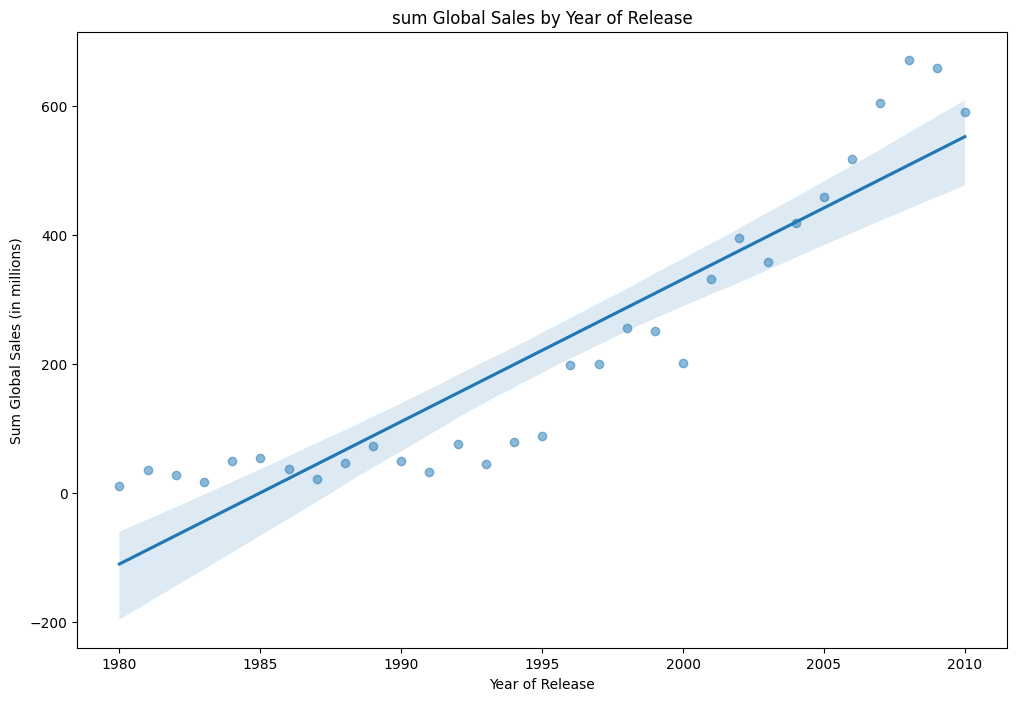

In [ ]:
# Filtrer les données pour inclure seulement les années jusqu'à 2010  par manque de donnée "récente" de 2016
df_filtered = df_cleaned[df_cleaned['Year_of_Release'] <= 2010]

# Calculer la moyenne des ventes globales par année de sortie
sum_sales_per_year = df_filtered.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()

# Graphique de la moyenne des ventes globales par année de sortie
plt.figure(figsize=(12, 8))
sns.regplot(x='Year_of_Release', y='Global_Sales', data=sum_sales_per_year, scatter_kws={'alpha':0.5})
plt.xlabel('Year of Release')
plt.ylabel('Sum Global Sales (in millions)')
plt.title('sum Global Sales by Year of Release')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Préparation des données
X = df_cleaned[['Critic_Score', 'User_Score']]
y = df_cleaned['Global_Sales']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 4.121323933819459
R^2 Score: 0.022383971092057364
